<a href="https://colab.research.google.com/github/puzzle91/Model-Pipeline-Machine-Learning/blob/master/Set3(Pipe4)1/3(Non_Fraud).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy
from google.colab import drive



import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.datasets import make_classification
from scipy.sparse import issparse
from sklearn.model_selection import train_test_split

#from imblearn.datasets import fetch_datasets
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

#from sklearn.neighbors import KNeighborsClassifier as KNN



from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC )

from imblearn.pipeline import make_pipeline

from collections import Counter

from sklearn.svm import LinearSVC

from imblearn.pipeline import make_pipeline



#SMOTE & OTHER OVERSAMPLING METHODS:
from imblearn.over_sampling import ADASYN

from imblearn.over_sampling import (SMOTE, RandomOverSampler, BorderlineSMOTE, SVMSMOTE, SMOTENC)


#from kmeans_smote import KMeansSMOTE


#SMOTE EXTENSIONS THAT COMBINE OVER & UNDER SAMPLING 

from imblearn.combine import SMOTEENN, SMOTETomek


from imblearn.base import BaseSampler

#from imblearn.over_sampling import KMeansSMOTE


# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import (EasyEnsembleClassifier,BalancedRandomForestClassifier, RUSBoostClassifier, BalancedBaggingClassifier)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc
from imblearn.pipeline import pipeline


#Metrics:
from sklearn.metrics import roc_curve

from sklearn.metrics import (accuracy_score,confusion_matrix, classification_report, roc_auc_score,
f1_score, recall_score, precision_score, SCORERS)
from imblearn.metrics import (sensitivity_score, specificity_score, geometric_mean_score, classification_report_imbalanced)
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve


import warnings
warnings.filterwarnings("ignore")

print(__doc__)

Automatically created module for IPython interactive environment


In [0]:

drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
cd 'My Drive/Diss-EDA/EDA-Dissertation' 


/gdrive/My Drive/Diss-EDA/EDA-Dissertation


In [0]:
rand_state = 42

In [0]:
df = pd.read_csv('creditcard.csv')

# print(df.head(5))
# print("missing values:", df.isnull().sum().max())
# print("----"*10)

# print(df.columns)
print(df.describe)

print("----"*10)
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print("NotFraud:", df['Class'].value_counts()[0])
print ("fraud:", df['Class'].value_counts()[1])
print("----"*10)
# Good No Null Values!
print("NULL VALUES", df.isnull().sum().max())

# print("SIZE:", len(df))

print(df['Amount']) 

print("Min (0 - transaction amount):", min(df['Amount']))
print("Max:", max(df['Amount']))


print("done")


#help(df)

print(df['Amount'].cummin())

<bound method NDFrame.describe of             Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]>
----------------------------------------
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
NotFra


You first need to split the data into training and test set (validation set might also be required).

Don't forget that testing data points represent real-world data. Feature normalization (or data standardization) of the explanatory (or predictor) variables is a technique used to center and normalise the data by subtracting the mean and dividing by the variance. If you take the mean and variance of the whole dataset you'll be introducing future information into the training explanatory variables (i.e. the mean and variance).

Therefore, you should perform feature normalisation over the training data. Then perform normalisation on testing instances as well, but this time using the mean and variance of training explanatory variables. In this way, we can test and evaluate whether our model can generalize well to new, unseen data points.

shareimprove this answer

In [0]:


original_df = df
# print(df.head(5))

df = df.sample(frac=1, random_state=rand_state)


# print('No Frauds in validation set', round(validation_df['Class'].value_counts()[0]/len(validation_df) * 100,2), '% of the dataset')
# print('Frauds in validation set', round(validation_df['Class'].value_counts()[1]/len(validation_df) * 100,2), '% of the dataset')
# print('count non-fraud in validation set:', validation_df['Class'].value_counts()[0])
# print('count fraud in validation set:', validation_df['Class'].value_counts()[1])

# train_df = df.drop(validation_df.index)





X = df.drop('Class', axis=1)
y = df['Class']


# xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

# sss = StratifiedKFold(n_splits=10, random_state=rand_state, shuffle=False)

# for train_index, test_index in sss.split(X, y):
#     print("Train:", train_index, "Test:", test_index)
#     original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
#     original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


# # Turn into an array
# original_Xtrain = original_Xtrain.values
# original_Xtest = original_Xtest.values
# original_ytrain = original_ytrain.values
# original_ytest = original_ytest.values



In [0]:
#SCALING DATA
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)


scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)


In [0]:
colors = ["#0101DF", "#DF0101"]


In [0]:

# Lets shuffle the training data before creating the subsamples

fraction = (int(round(284315*1/3,0)))
 #df.sample(frac=1, random_state=rand_state)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1] #Taking all fraud cases
non_fraud_df = df.loc[df['Class'] == 0][:fraction] #Taking 15000  non_fraud cases

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=rand_state)

print("NEW DF:", new_df.head(5))

print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()) 
print(len(new_df))


#print(set(new_df['Class']))

NEW DF:         scaled_amount  scaled_time        V1  ...       V27       V28  Class
249709      -0.144903     0.820604  2.221338  ...  0.028481 -0.083333      0
138380      -0.254594    -0.024284 -0.384157  ...  0.270982  0.097889      0
48368        0.804024    -0.482607 -5.294325  ... -1.618186 -0.514790      0
53275        0.293440    -0.455738 -7.004987  ...  1.304799 -2.368240      0
82153       -0.056033    -0.298699 -0.821371  ... -0.147501  0.112703      0

[5 rows x 31 columns]
Distribution of the Classes in the subsample dataset
0    94772
1      492
Name: Class, dtype: int64
95264


In [0]:
# f, axes = plt.subplots(ncols=4, figsize=(20,4))
# colors = ["#0101DF", "#DF0101"]

# # Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
# sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
# axes[0].set_title('V11 vs Class Positive Correlation')

# sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
# axes[1].set_title('V4 vs Class Positive Correlation')


# sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
# axes[2].set_title('V2 vs Class Positive Correlation')


# sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
# axes[3].set_title('V19 vs Class Positive Correlation')

# plt.show()

In [0]:
# colors = ["#0101DF", "#DF0101"]
# f, axes = plt.subplots(ncols=4, figsize=(20,4))

# # Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
# sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
# axes[0].set_title('V17 vs Class Negative Correlation')

# sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
# axes[1].set_title('V14 vs Class Negative Correlation')


# sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
# axes[2].set_title('V12 vs Class Negative Correlation')


# sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
# axes[3].set_title('V10 vs Class Negative Correlation')

# plt.show()

In [0]:
# f, axes = plt.subplots(ncols=4, figsize=(20,4))

# # Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
# sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
# axes[0].set_title('V11 vs Class Positive Correlation')

# sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
# axes[1].set_title('V4 vs Class Positive Correlation')


# sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
# axes[2].set_title('V2 vs Class Positive Correlation')


# sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
# axes[3].set_title('V19 vs Class Positive Correlation')

# plt.show()

In [0]:
# from scipy.stats import norm

# f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

# v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
# sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
# ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

# v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
# sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
# ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


# v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
# sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
# ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

# plt.show()

In [0]:
# from scipy.stats import norm

# f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

# v1_fraud_dist = new_df['V1'].loc[new_df['Class'] == 1].values
# sns.distplot(v1_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
# ax1.set_title('V1 Distribution \n (Fraud Transactions)', fontsize=14)

# v2_fraud_dist = new_df['V2'].loc[new_df['Class'] == 1].values
# sns.distplot(v2_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
# ax2.set_title('V2 Distribution \n (Fraud Transactions)', fontsize=14)


# v3_fraud_dist = new_df['V3'].loc[new_df['Class'] == 1].values
# sns.distplot(v3_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
# ax3.set_title('V3 Distribution \n (Fraud Transactions)', fontsize=14)

# plt.show()

In [0]:
# # # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
# outliers = 0
# threshold = 1.5
# v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values

# q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
# print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
# v14_iqr = q75 - q25
# print('iqr: {}'.format(v14_iqr))

# v14_cut_off = v14_iqr * threshold
# v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
# print('Cut Off: {}'.format(v14_cut_off))
# print('V14 Lower: {}'.format(v14_lower))
# print('V14 Upper: {}'.format(v14_upper))

# outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
# outliers_count = outliers_count+len(outliers)
# print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
# print('V10 outliers:{}'.format(outliers))

# new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
# print('----' * 44)

# # -----> V12 removing outliers from fraud transactions
# v12_fraud = new_df['V12'].loc[new_df['Class'] ==1].values
# q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
# v12_iqr = q75 - q25

# v12_cut_off = v12_iqr *threshold
# v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
# print('V12 Lower: {}'.format(v12_lower))
# print('V12 Upper: {}'.format(v12_upper))
# outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
# outlier_count = outliers_count+len(outliers)
# print('V12 outliers: {}'.format(outliers))
# print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
# new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
# print('Number of Instances after outliers removal: {}'.format(len(new_df)))
# print('----' * 44)


# # Removing outliers V10 Feature
# v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
# q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
# v10_iqr = q75 - q25

# v10_cut_off = v10_iqr * threshold
# v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
# print('V10 Lower: {}'.format(v10_lower))
# print('V10 Upper: {}'.format(v10_upper))
# outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
# outliers_count = outliers_count+len(outliers)
# print('V10 outliers: {}'.format(outliers))
# print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
# new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
# print('Number of Instances after outliers removal: {}'.format(len(new_df)))

In [0]:
# print("before removal:",len(df))
# print("After:",len(new_df))
# print("Total outliers found:",outliers_count)
# print("total outlers removed:", len(df)-len(new_df))

In [0]:
# f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

# colors = ['#B3F9C5', '#f9c5b3']
# # Boxplots with outliers removed
# # Feature V14
# sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
# ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
# ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
#             arrowprops=dict(facecolor='black'),
#             fontsize=14)

# # Feature 12
# sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
# ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
# ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
#             arrowprops=dict(facecolor='black'),
#             fontsize=14)

# # Feature V10
# sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
# ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
# ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
#             arrowprops=dict(facecolor='black'),
#             fontsize=14)


# plt.show()

In [0]:
# Creating a new Dataframe training dataframe
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_vals = X.values
y_vals = y.values
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [0]:
def plot_scatter(X, y, title):
    """Function to plot some data as a scatter plot."""
    plt.figure( figsize=(16,16))
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', label='Class #1 - Fraud')
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b', label='Class #0 - Non-Fraud')
    plt.legend()
    plt.title(title)

# New Section

95264 95264


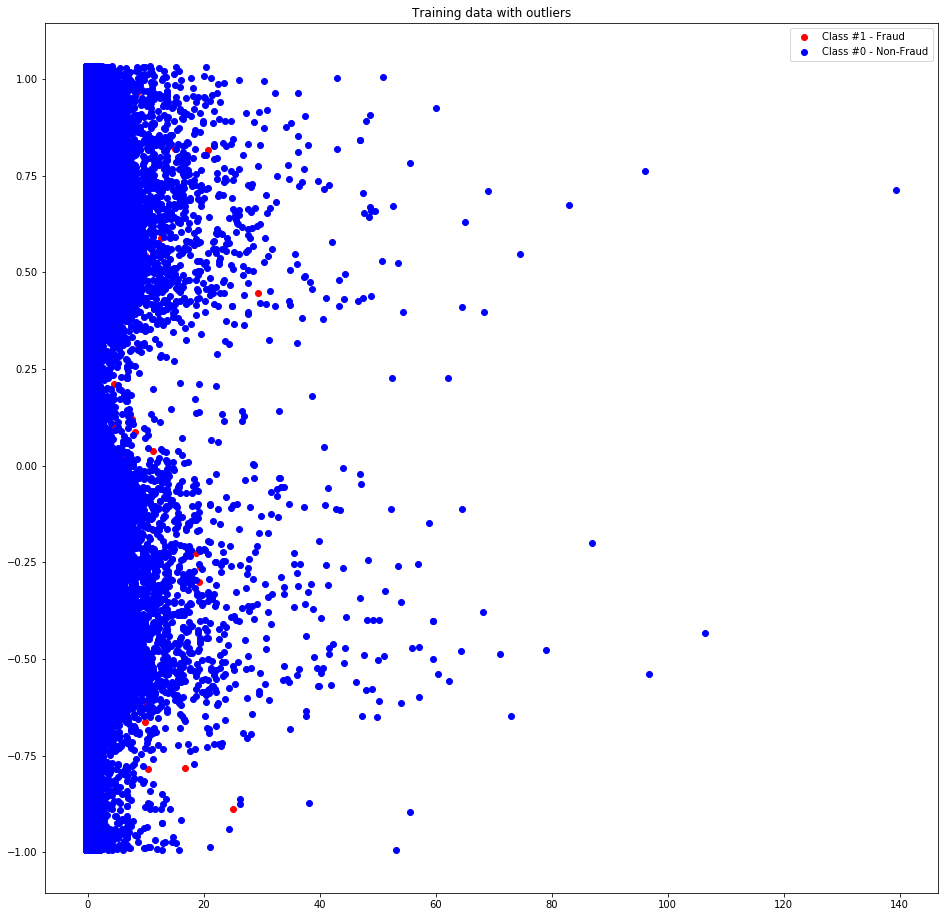

In [0]:

plot_scatter(X_vals, y_vals, 'Training data with outliers')

print(len(X_vals),  len(y_vals))

In [0]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

from imblearn import FunctionSampler
    #This will be our function used to resample our dataset.
   # ISOLATION FOREST ALOGIRTHM WILL BE USED TO REMOVE OUTLIERS during training


def outlier_rejection(X, y):
    """This will be our function used to resample our dataset."""
    model = IsolationForest(max_samples=1000,
                                contamination='auto',
                                random_state=rand_state,
                                behaviour='new')
    model.fit(X)
    y_pred = model.predict(X)
    return X[y_pred == 1], y[y_pred == 1]



Total outliers removed: 1797
New lenght of X: 93467 ; new length of y 93467


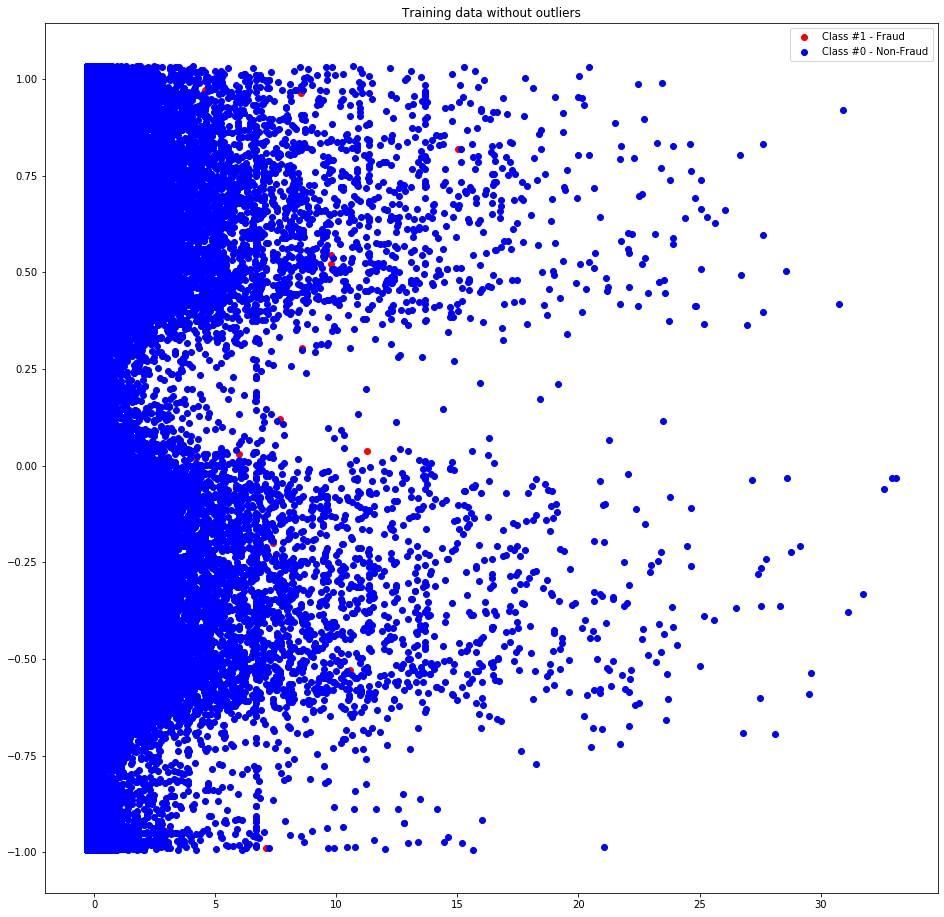

In [0]:
reject_sampler = FunctionSampler(func=outlier_rejection)
X_vals = X.values
y_vals =y.values
X_inliers, y_inliers = reject_sampler.fit_resample(X_vals, y_vals)
plot_scatter(X_inliers, y_inliers, 'Training data without outliers')

print("Total outliers removed: {:}".format(len(X_vals) - len(X_inliers)))
print("New lenght of X: {} ; new length of y {}".format(len(X_inliers),  len(y_inliers)))

In [0]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.unique(y_true), np.unique(y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




In [0]:


def distbox_plot(data):
    '''Function to plot a seaborn distribution plot 
        with a box plot on top.
        Reference: https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/'''
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(14,4),gridspec_kw={"height_ratios": (.15, .85)})
    # Add a graph in each part
    sns.boxplot(data, ax=ax_box)
    sns.distplot(data, ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    #Print describtive statistics
    print(data.describe())
    
def plot_feat_importance(clf,index):
    '''Plot the 0 most important features for a classifier model in a bar chart
    according to importance'''
    feat_importances = pd.DataFrame(clf.feature_importances_, index=index, columns=['Score'])
    feat_importances = feat_importances.sort_values(by='Score',ascending=True).tail(10)
    feat_importances.plot(kind='barh', title='Top 10 Important Features',legend=False)
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show();
    
def heatmap(data,figsize=(8,8), annot=False):
    #plot heatmap to find multicollinearity
    plt.figure(figsize=figsize)
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    sns.heatmap(data.corr(),vmin=-0.75,vmax=0.75,center=0, cmap=cmap,annot=annot);

def grid_pipe(pipedict, hyperdict, scoring='accuracy', display=True):
    model_scores=[]
    fitted_models={}
    for name, pipeline in pipedict.items():
    # Construct grid search
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=5, verbose=2, n_jobs=-1, return_train_score = True)

        # Fit using grid search
        start = time.time()
        model.fit(original_Xtrain, original_ytrain)
        end = time.time()
        #Append socres and time
        model_scores.append((name,model.best_score_,end-start))
        #Append model
        fitted_models[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # Best accuracy
            print('Best f1: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')
    
    return model_scores, fitted_models



















scaled_amount  V2              -0.531409
V2             scaled_amount   -0.531409
V3             scaled_time     -0.419618
scaled_time    V3              -0.419618
V5             scaled_amount   -0.386356
                                  ...   
V24            V24              1.000000
V25            V25              1.000000
V26            V26              1.000000
V13            V13              1.000000
Class          Class            1.000000
Length: 961, dtype: float64


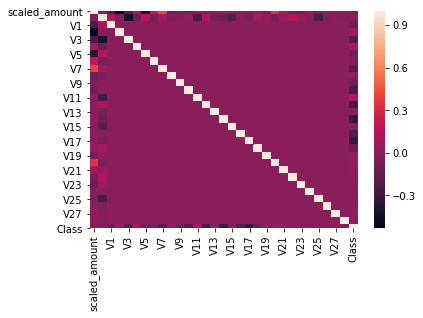

In [0]:
z = pd.DataFrame(df)


c = z.corr()
sns.heatmap(c)
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

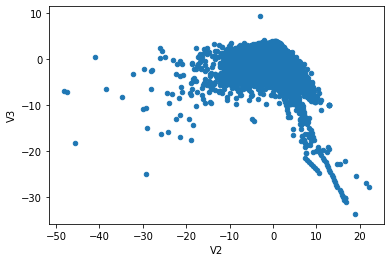

In [0]:
new_df.plot.scatter('V2','V3')


In [0]:
# !pip install pyod
# !pip install --upgrade pyod  # to make sure that the latest version is installed!
# from pyod.models.abod import ABOD
# from pyod.models.knn import KNN
# import matplotlib.font_manager
# from pyod.utils.data import generate_data, get_outliers_inliers
# from pyod.models.abod import ABOD
# from pyod.models.cblof import CBLOF
# from pyod.models.feature_bagging import FeatureBagging
# from pyod.models.hbos import HBOS
# from pyod.models.iforest import IForest
# from pyod.models.knn import KNN
# from pyod.models.lof import LOF
# from sklearn.preprocessing import MinMaxScaler



# def remove_outliers(data=[], verbose=False):
#         X = data.drop('Class', axis=1)
#         y = data['Class']
#         print("In the plots below, the white points are inliers surrounded by red lines, and the black points are outliers in the blue zone.")
#         random_state = np.random.RandomState(42)
#         outliers_fraction = 0.05
#         # Define seven outlier detection tools to be compared
#         classifiers = {
#                 'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
#                 'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
#                 'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
#                 'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
#                 'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
#                 'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
#                 'Average KNN': KNN(method='mean',contamination=outliers_fraction)
#         }


#         xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

#         for i, (clf_name, clf) in enumerate(classifiers.items()):
#             clf.fit(X)
#             # predict raw anomaly score
#             scores_pred = clf.decision_function(X) * -1
                
#             # prediction of a datapoint category outlier or inlier
#             y_pred = clf.predict(X)
#             n_inliers = len(y_pred) - np.count_nonzero(y_pred)
#             n_outliers = np.count_nonzero(y_pred == 1)
#             plt.figure(figsize=(10, 10))
            
#             # copy of dataframe
#             dfx = df
#             dfx['outlier'] = y_pred.tolist()
            
#             # IX1 - inlier feature 1,  IX2 - inlier feature 2
#             IX1 =  np.array(dfx['Item_MRP'][dfx['outlier'] == 0]).reshape(-1,1)
#             IX2 =  np.array(dfx['Item_Outlet_Sales'][dfx['outlier'] == 0]).reshape(-1,1)
            
#             # OX1 - outlier feature 1, OX2 - outlier feature 2
#             OX1 =  dfx['Item_MRP'][dfx['outlier'] == 1].values.reshape(-1,1)
#             OX2 =  dfx['Item_Outlet_Sales'][dfx['outlier'] == 1].values.reshape(-1,1)
                
#             print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
                
#             # threshold value to consider a datapoint inlier or outlier
#             threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
                
#             # decision function calculates the raw anomaly score for every point
#             Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
#             Z = Z.reshape(xx.shape)
                  
#             # fill blue map colormap from minimum anomaly score to threshold value
#             plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
                
#             # draw red contour line where anomaly score is equal to thresold
#             a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
                
#             # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
#             plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
                
#             b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
            
#             c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
              
#             plt.axis('tight')  
            
#             # loc=2 is used for the top left corner 
#             plt.legend(
#                 [a.collections[0], b,c],
#                 ['learned decision function', 'inliers','outliers'],
#                 prop=matplotlib.font_manager.FontProperties(size=20),
#                 loc=2)
              
#             plt.xlim((0, 1))
#             plt.ylim((0, 1))
#             plt.title(clf_name)
#             plt.show()



In [0]:
# remove_outliers(data=new_df, verbose=False)

In [0]:
def nosampling_pipeline(data=[],  verbose=False, clean=False, plot=False):
          
          results_table=[]
          results=[]
          rand_state =42
          
          if clean:
              #data = data.sample(frac=1, shuffle = False)
              X = data.drop('Class', axis=1)
              y = data['Class']
              X_vals=X.values
              y_vals=y.values
              X_inliners, y_inliners = reject_sampler.fit_resample(X_vals, y_vals)
              X=X_inliners
              y=y_inliners
          else:
              X = data.drop('Class', axis=1)
              y = data['Class']
              X=X.values  
              y=y.values
              pass

          sss = StratifiedKFold(n_splits=10, random_state=rand_state, shuffle=False)
          print("StratKFold:",sss)


          #List of models to be used
          models=[DecisionTreeClassifier(random_state=rand_state), RUSBoostClassifier(random_state=rand_state),
                  LogisticRegression(random_state=rand_state), BalancedBaggingClassifier(random_state=rand_state),
                RandomForestClassifier(random_state=rand_state),
                 EasyEnsembleClassifier(base_estimator=RandomForestClassifier(random_state=rand_state),random_state=rand_state),
                  BalancedRandomForestClassifier(random_state=rand_state)]

        
          results_table = pd.DataFrame(columns=['models', 'fpr','tpr','auc'])
          #Create training and testing data sets depending on wheather or not they have been generated previously.
          #Instantiate lists to store each of the models results
          statergy =[]
          classifier = []
          strategy=[]
          samp_technique=[]
          accuracy = []
          f1 = []
          auc = []
          recall = []
          precision = []
          g_mean = []
          start = time.time()
          #Run thorugh each of the models to get their performance metrics
          
         
          sampling_strat = 'no_sampling'
          
    

          
          for train_index, test_index in sss.split(X,y):
          
          
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

          # X_train=X_train.values
          # X_test=X_test.values
          # y_train=y_train.values
          # y_test=y_test.values

          for model in models: 
            print("Using lentgh of X for training: {}; Using Length of Y for training: {}".format(len(X_train), len(y_train)))
            print("Using lentgh of X for testing: {}; Using Length of Y for test: {}".format(len(X_test), len(y_test)))
            strat = ""
            
            print("Currently training model - {} using sampling strategy - {}".format(model.__class__.__name__, sampling_strat))
            print("--"*20)


            clf = model
           
            pipe = make_pipeline(clf) # LOG_REG_MODEL WITH BOTHER
            pipe.fit(X_train, y_train)
            
            
            test_preds = pipe.predict(X_test)
            #yproba = pipe.predict_proba(X_test)[::,1] 
            
            classifier.append(model.__class__.__name__)
            samp_technique.append(sampling_strat)
            strategy.append(" %s+%s " %(str(model.__class__.__name__), sampling_strat))

            f1.append(f1_score(y_test, test_preds))
            accuracy.append(accuracy_score(y_test, test_preds))
            auc.append(roc_auc_score(y_test, test_preds))
            recall.append(recall_score(y_test, test_preds))
            precision.append(precision_score(y_test, test_preds))
            g_mean.append(geometric_mean_score(y_test, test_preds, average='binary'))

  
            fpr, tpr, _ = roc_curve(y_test,  test_preds)
            auc_score = roc_auc_score(y_test, test_preds)
      
            results_table = results_table.append({'classifiers':model.__class__.__name__,
                                          'fpr':fpr, 
                                          'tpr':tpr, 
                                          'auc_score':auc_score}, ignore_index=True)
                                                                            

           
        #Print the model and its report
            if verbose:
                print('Classification Model: ', model.__class__.__name__,'\n')
                print ('Sampling Strategy Model: ', sampling_strat,'\n')
                print(confusion_matrix(y_test, test_preds),'\n')
                print(classification_report_imbalanced(y_test, test_preds),'\n')

          #round the results for convenience
          f1 = [float(round(n, 4)) for n in f1]
          auc = [float(round(n, 4)) for n in auc]
          g_mean = [float(round(n, 4)) for n in g_mean]
          accuracy = [float(round(n, 4)) for n in accuracy]
          precision = [float(round(n, 4)) for n in precision]
          recall = [float(round(n, 4)) for n in recall]

          #store results in dataframe
           
          results = pd.DataFrame([classifier, strategy, samp_technique, f1, auc, g_mean, accuracy, precision, recall],
                        index= ['classifier', 'strategy', 'samp_technique', 'f1','roc_auc','g_mean', 'accuracy','precision','recall'],
          columns=['DecisionTreeClassifier','RUSBoostClaassifier','LogisiticRegression', 'BalancedBaggingClassifier', 'RandomForestClassifier',
                                      'EasyEnsembleClassifier', 'BalancedRandomForestClassifier'])
          

          
    

          
          if plot:
              
              results_table.set_index('classifiers', inplace=True) 
              fig = plt.figure(figsize=(8,6))
              results_table.sort_values(by=['auc_score'],ascending=False)

              for i in results_table.index:
                  
                  plt.plot(results_table.loc[i]['fpr'], 
                          results_table.loc[i]['tpr'], 
                          label="{}, AUC={:.4f}".format(i, results_table.loc[i]['auc_score']))
                  
                  plt.plot([0,1], [0,1], color='orange', linestyle='--')

                  plt.xticks(np.arange(0.0, 1.1, step=0.1))
                  plt.xlabel("Flase Positive Rate", fontsize=15)

                  plt.yticks(np.arange(0.0, 1.1, step=0.1))
                  plt.ylabel("True Positive Rate", fontsize=15)

                  plt.title('ROC Curve for classifiers using Full data split using sampling technique: {}'.format(sampling_strat), fontweight='bold', fontsize=15)
                  plt.legend(prop={'size':13}, loc='lower right')

          plt.show()
          
      
          
          #Change orientation of the dataframe

          end = time.time()
          print("Time elapsed:", start-end)
          
          return results.transpose()


In [0]:
def base_pipeline(data=[], sampling_technique=[], clean=False, verbose=False, plot=False):
          
          results_table=[]
          results=[]
          rand_state =42
          # data = data   
          # if clean:
          #   data = remove_outliers(data=data, verbose=False)
          #   pass
          
          if clean:
              #data = data.sample(frac=1, shuffle = False)
              X = data.drop('Class', axis=1)
              y = data['Class']
              X_vals=X.values
              y_vals=y.values
              X_inliners, y_inliners = reject_sampler.fit_resample(X_vals, y_vals)
              X=X_inliners
              y=y_inliners
          else:
              X = data.drop('Class', axis=1)
              y = data['Class']
              X=X.values  
              y=y.values
              pass
          # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

          # # Turn the values into an array for feeding the classification algorithms.
          # X_train = X_train.values
          # X_test = X_test.values
          # y_train = y_train.values
          # y_test = y_test.values

          sss = StratifiedKFold(n_splits=10, random_state=rand_state, shuffle=False)
          print("Straitified kfold:", sss)


          #List of models to be used
          models=[DecisionTreeClassifier(random_state=rand_state),RUSBoostClassifier(random_state=rand_state), LogisticRegression(random_state=rand_state), BalancedBaggingClassifier(random_state=rand_state),
                RandomForestClassifier(random_state=rand_state), EasyEnsembleClassifier(base_estimator=RandomForestClassifier(random_state=rand_state),random_state=rand_state),
                  BalancedRandomForestClassifier(random_state=rand_state)]

        
          results_table = pd.DataFrame(columns=['models', 'fpr','tpr','auc'])
          #Create training and testing data sets depending on wheather or not they have been generated previously.
          #Instantiate lists to store each of the models results
          accuracy = []
          f1 = []
          auc = []
          recall = []
          precision = []
          g_mean = []
          strategy = []
          classifier =[]
          samp_technique=[]
          start = time.time()
          
          #Run thorugh each of the models to get their performance metrics
          #fold  = sss.split(X,y)
          sampling_strat = sampling_technique
         
          for train_index, test_index in sss.split(X,y):
          
          
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

          # X_train=X_train.values
          # X_test=X_test.values
          # y_train=y_train.values
          # y_test=y_test.values

          for model in models: 
            print("Using lentgh of X for training: {}; Using Length of Y for training: {}".format(len(X_train), len(y_train)))
            print("Using lentgh of X for testing: {}; Using Length of Y for test: {}".format(len(X_test), len(y_test)))
            strat = ""
            
            print("Currently training model - {} using sampling strategy - {}".format(model.__class__.__name__, sampling_strat.__class__.__name__))
            print("--"*20)

            clf = model
            sampling_technique = sampling_strat
            pipe = make_pipeline(sampling_strat, clf) # LOG_REG_MODEL WITH BOTHER
            pipe.fit(X_train, y_train)
            t2=time.time()
            print("Time training:", start-t2)
            test_preds = pipe.predict(X_test)
            #yproba = pipe.predict_proba(X_test)[::,1]


            strategy.append(" %s+%s " %(str(model.__class__.__name__), str(sampling_strat.__class__.__name__)))
            classifier.append(model.__class__.__name__)
            samp_technique.append(sampling_strat.__class__.__name__)
            f1.append(f1_score(y_test, test_preds))
            accuracy.append(accuracy_score(y_test, test_preds))
            auc.append(roc_auc_score(y_test, test_preds))
            recall.append(recall_score(y_test, test_preds))
            precision.append(precision_score(y_test, test_preds))
            g_mean.append(geometric_mean_score(y_test, test_preds, average='binary'))

  
            fpr, tpr, _ = roc_curve(y_test,  test_preds)
            auc_score = roc_auc_score(y_test, test_preds)
      
            results_table = results_table.append({'classifiers':model.__class__.__name__,
                                          'fpr':fpr, 
                                          'tpr':tpr, 
                                          'auc_score':auc_score}, ignore_index=True)
                                                                            


              
        #Print the model and its report
            if verbose:
                print('Classification Model: ', model.__class__.__name__,'\n')
                print ('Sampling Strategy Model: ', sampling_technique.__class__.__name__,'\n')
                print(confusion_matrix(y_test, test_preds),'\n')
                print(classification_report_imbalanced(y_test, test_preds),'\n')


          
          #round the results for convenience

          f1 = [float(round(n, 4)) for n in f1]
          auc = [float(round(n, 4)) for n in auc]
          g_mean = [float(round(n, 4)) for n in g_mean]
          accuracy = [float(round(n, 4)) for n in accuracy]
          precision = [float(round(n, 4)) for n in precision]
          recall = [float(round(n, 4)) for n in recall]

          #store results in dataframe
          results = pd.DataFrame([classifier, strategy, samp_technique, f1, auc, g_mean, accuracy, precision, recall],
                        index= ['classifier', 'strategy', 'samp_technique', 'f1','roc_auc','g_mean', 'accuracy','precision','recall'],
          columns=['DecisionTreeClassifier','RUSBoostClaassifier','LogisiticRegression', 'BalancedBaggingClassifier', 'RandomForestClassifier',
                                      'EasyEnsembleClassifier', 'BalancedRandomForestClassifier'])


        
          
        
          if plot:
              
              results_table.set_index('classifiers', inplace=True) 
              fig = plt.figure(figsize=(8,6))
              results_table.sort_values(by=['auc_score'],ascending=False)

              for i in results_table.index:
                  
                  plt.plot(results_table.loc[i]['fpr'], 
                          results_table.loc[i]['tpr'], 
                          label="{}, AUC={:.4f}".format(i, results_table.loc[i]['auc_score']))
                  
                  plt.plot([0,1], [0,1], color='orange', linestyle='--')

                  plt.xticks(np.arange(0.0, 1.1, step=0.1))
                  plt.xlabel("Flase Positive Rate", fontsize=15)

                  plt.yticks(np.arange(0.0, 1.1, step=0.1))
                  plt.ylabel("True Positive Rate", fontsize=15)

                  plt.title('ROC Curve for classifiers using full dataset and using sampling technique: {}'.format(sampling_technique.__class__.__name__), fontweight='bold', fontsize=15)
                  plt.legend(prop={'size':13}, loc='lower right')

          plt.show()
          
      
          
          #Change orientation of the dataframe

          end = time.time()
          print("Time elapsed:", start-end)
          results = results.round(4)
          return results.transpose()


Straitified kfold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - DecisionTreeClassifier using sampling strategy - SMOTE
----------------------------------------
Time training: -14.499603986740112
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - RUSBoostClassifier using sampling strategy - SMOTE
----------------------------------------
Time training: -29.155688285827637
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - LogisticRegression using sampling strategy - SMOTE
----------------------------------------
Time training: -32.90336751937866
Using lentgh o

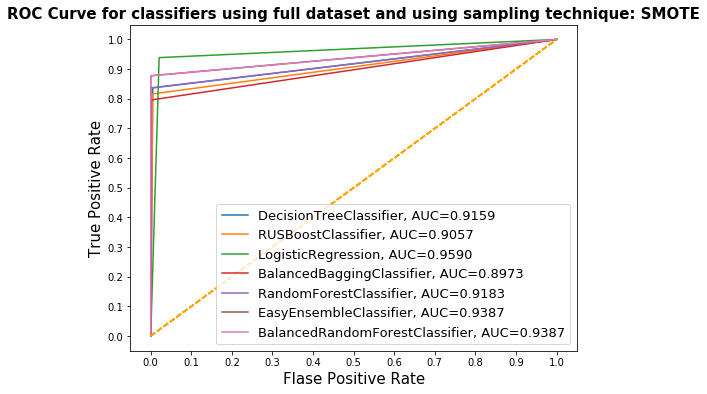

Time elapsed: -419.472021818161
Straitified kfold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - DecisionTreeClassifier using sampling strategy - SMOTE
----------------------------------------
Time training: -14.048447132110596
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - RUSBoostClassifier using sampling strategy - SMOTE
----------------------------------------
Time training: -27.77128267288208
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - LogisticRegression using sampling strategy - SMOTE
----------------------------------------
Time training: -3

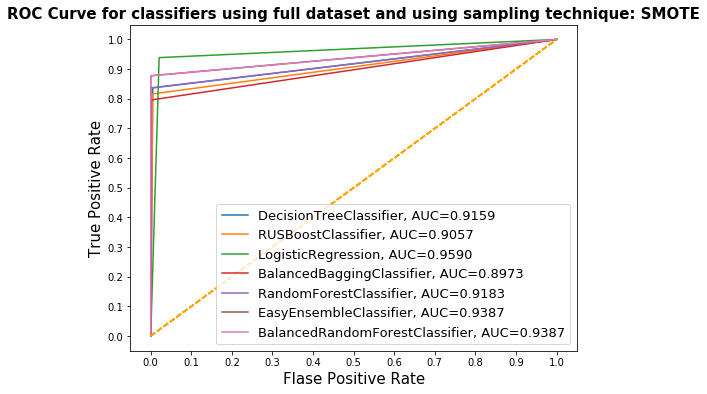

Time elapsed: -396.1318163871765
                                                    classifier  ...  recall
DecisionTreeClassifier                  DecisionTreeClassifier  ...  0.8367
RUSBoostClaassifier                         RUSBoostClassifier  ...  0.8163
LogisiticRegression                         LogisticRegression  ...  0.9388
BalancedBaggingClassifier            BalancedBaggingClassifier  ...  0.7959
RandomForestClassifier                  RandomForestClassifier  ...  0.8367
EasyEnsembleClassifier                  EasyEnsembleClassifier  ...  0.8776
BalancedRandomForestClassifier  BalancedRandomForestClassifier  ...  0.8776

[7 rows x 9 columns]


In [0]:
#PIPELINE 1 - FOR SMOTE:
sm = SMOTE(random_state=42)
results1 = base_pipeline(data=new_df, sampling_technique=sm, clean=False, verbose=False, plot=True)
results1_clean = base_pipeline(data=new_df, sampling_technique=sm, clean=False, verbose=False, plot=True)
print(results1)


results1_clean.to_csv("Results/pipe4/results1(SMOTE)-clean.csv", index=True, encoding='utf8')
results1.to_csv("Results/pipe4/results1(SMOTE).csv", index=True, encoding='utf8')

StratKFold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - DecisionTreeClassifier using sampling strategy - no_sampling
----------------------------------------
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - RUSBoostClassifier using sampling strategy - no_sampling
----------------------------------------
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - LogisticRegression using sampling strategy - no_sampling
----------------------------------------
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing:

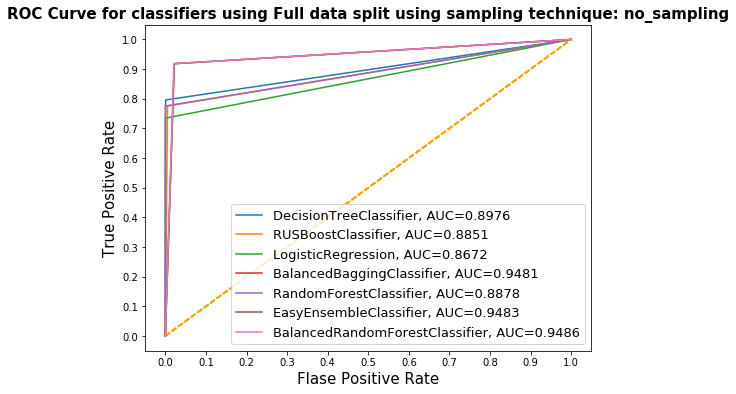

Time elapsed: -24.292624473571777
StratKFold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - DecisionTreeClassifier using sampling strategy - no_sampling
----------------------------------------
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - RUSBoostClassifier using sampling strategy - no_sampling
----------------------------------------
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - LogisticRegression using sampling strategy - no_sampling
----------------------------------------
Using lentgh of X for training: 84122; Using Length of Y for training: 84

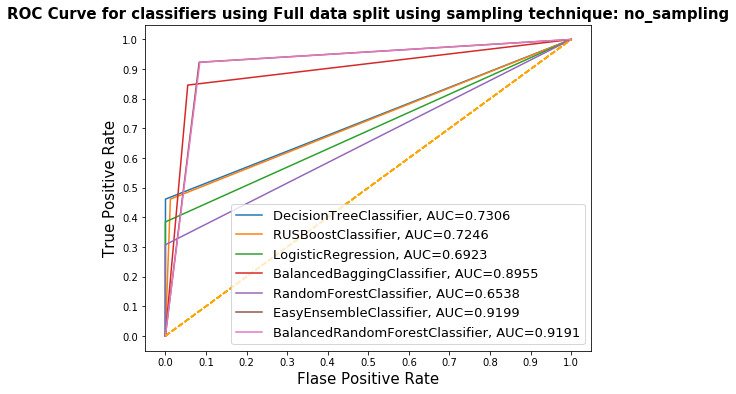

Time elapsed: -24.725704193115234


In [0]:
results0 = nosampling_pipeline(data=new_df, verbose=False, clean=False, plot=True)
results0_clean = nosampling_pipeline(data=new_df, verbose=False, clean=True, plot=True)


results0.to_csv("Results/pipe4/results0(Nosampling).csv", index=True, encoding='utf8')
results0_clean.to_csv("Results/pipe4/results0(Nosampling)-clean.csv", index=True, encoding='utf8')





In [0]:
results0

,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+no_sampling,no_sampling,0.8298,0.8976,0.8919,0.9983,0.8667,0.7959
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+no_sampling,no_sampling,0.5507,0.8851,0.8783,0.9935,0.427,0.7755
LogisiticRegression,LogisticRegression,LogisticRegression+no_sampling,no_sampling,0.8276,0.8672,0.8571,0.9984,0.9474,0.7347
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+no_sampling,no_sampling,0.2961,0.9481,0.9476,0.9775,0.1765,0.9184
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+no_sampling,no_sampling,0.8736,0.8878,0.8806,0.9988,1,0.7755
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+no_sampling,no_sampling,0.299,0.9483,0.9478,0.9779,0.1786,0.9184
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+no_sampling,no_sampling,0.3061,0.9486,0.9481,0.9786,0.1837,0.9184


In [0]:
#Sort models according to f1 score.
results0.sort_values('f1',ascending=False)

,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+no_sampling,no_sampling,0.8736,0.8878,0.8806,0.9988,1,0.7755
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+no_sampling,no_sampling,0.8298,0.8976,0.8919,0.9983,0.8667,0.7959
LogisiticRegression,LogisticRegression,LogisticRegression+no_sampling,no_sampling,0.8276,0.8672,0.8571,0.9984,0.9474,0.7347
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+no_sampling,no_sampling,0.5507,0.8851,0.8783,0.9935,0.427,0.7755
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+no_sampling,no_sampling,0.3061,0.9486,0.9481,0.9786,0.1837,0.9184
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+no_sampling,no_sampling,0.299,0.9483,0.9478,0.9779,0.1786,0.9184
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+no_sampling,no_sampling,0.2961,0.9481,0.9476,0.9775,0.1765,0.9184


In [0]:
#Sort models according to f1 score.
results0.sort_values('roc_auc',ascending=False)

,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+no_sampling,no_sampling,0.3061,0.9486,0.9481,0.9786,0.1837,0.9184
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+no_sampling,no_sampling,0.299,0.9483,0.9478,0.9779,0.1786,0.9184
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+no_sampling,no_sampling,0.2961,0.9481,0.9476,0.9775,0.1765,0.9184
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+no_sampling,no_sampling,0.8298,0.8976,0.8919,0.9983,0.8667,0.7959
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+no_sampling,no_sampling,0.8736,0.8878,0.8806,0.9988,1,0.7755
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+no_sampling,no_sampling,0.5507,0.8851,0.8783,0.9935,0.427,0.7755
LogisiticRegression,LogisticRegression,LogisticRegression+no_sampling,no_sampling,0.8276,0.8672,0.8571,0.9984,0.9474,0.7347


In [0]:
results0.sort_values('g_mean',ascending=False)

,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+no_sampling,no_sampling,0.3061,0.9486,0.9481,0.9786,0.1837,0.9184
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+no_sampling,no_sampling,0.299,0.9483,0.9478,0.9779,0.1786,0.9184
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+no_sampling,no_sampling,0.2961,0.9481,0.9476,0.9775,0.1765,0.9184
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+no_sampling,no_sampling,0.8298,0.8976,0.8919,0.9983,0.8667,0.7959
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+no_sampling,no_sampling,0.8736,0.8878,0.8806,0.9988,1,0.7755
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+no_sampling,no_sampling,0.5507,0.8851,0.8783,0.9935,0.427,0.7755
LogisiticRegression,LogisticRegression,LogisticRegression+no_sampling,no_sampling,0.8276,0.8672,0.8571,0.9984,0.9474,0.7347


In [0]:
print('Best Model per Metric using No smapling technique  ')
for metric in results0.columns:
    print(f'{metric.capitalize()}:',results0.sort_values(metric,ascending=False).index[0])

Best Model per Metric using No smapling technique  
Classifier: RandomForestClassifier
Strategy: RandomForestClassifier
Samp_technique: DecisionTreeClassifier
F1: RandomForestClassifier
Roc_auc: BalancedRandomForestClassifier
G_mean: BalancedRandomForestClassifier
Accuracy: RandomForestClassifier
Precision: RandomForestClassifier
Recall: BalancedBaggingClassifier


In [0]:
print("STARTING PIPELINE 1 - SMOTE PIPE", "-"*40)

STARTING PIPELINE 1 - SMOTE PIPE ----------------------------------------


BUILDING PIPELINES: 


In [0]:
results1

,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+SMOTE,SMOTE,0.5985,0.9159,0.9125,0.9942,0.4659,0.8367
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+SMOTE,SMOTE,0.5926,0.9057,0.9013,0.9942,0.4651,0.8163
LogisiticRegression,LogisticRegression,LogisticRegression+SMOTE,SMOTE,0.3151,0.959,0.9588,0.979,0.1893,0.9388
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+SMOTE,SMOTE,0.78,0.8973,0.8916,0.9977,0.7647,0.7959
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+SMOTE,SMOTE,0.8913,0.9183,0.9146,0.999,0.9535,0.8367
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+SMOTE,SMOTE,0.9247,0.9387,0.9367,0.9993,0.9773,0.8776
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+SMOTE,SMOTE,0.9247,0.9387,0.9367,0.9993,0.9773,0.8776


In [0]:
results1

,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+SMOTE,SMOTE,0.5985,0.9159,0.9125,0.9942,0.4659,0.8367
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+SMOTE,SMOTE,0.5926,0.9057,0.9013,0.9942,0.4651,0.8163
LogisiticRegression,LogisticRegression,LogisticRegression+SMOTE,SMOTE,0.3151,0.959,0.9588,0.979,0.1893,0.9388
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+SMOTE,SMOTE,0.78,0.8973,0.8916,0.9977,0.7647,0.7959
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+SMOTE,SMOTE,0.8913,0.9183,0.9146,0.999,0.9535,0.8367
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+SMOTE,SMOTE,0.9247,0.9387,0.9367,0.9993,0.9773,0.8776
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+SMOTE,SMOTE,0.9247,0.9387,0.9367,0.9993,0.9773,0.8776


In [0]:
# results1_clean

In [0]:
# results1_clean

In [0]:

from scipy.stats import wilcoxon

for i in results1, results0:

  stat0, p0 = wilcoxon(results1['roc_auc'], results0['roc_auc'])
  stat1, p1 = wilcoxon(results1['f1'], results0['f1'])

print('ROC_AUC: stat=%.3f, p=%.3f'%(stat0,p0))
print('F1:   stat=%.3f, p=%.3f'%(stat1, p1))
if p0 > 0.05:
	print('ROC_AUC: Probably the same distribution')
else:
	print('ROC_AUC: Probably different distributions')
if p1 > 0.05:
	print('F1: Probably the same distribution')
else:
	print('F1: Probably different distributions')

ROC_AUC: stat=9.000, p=0.398
F1:   stat=8.000, p=0.310
ROC_AUC: Probably the same distribution
F1: Probably the same distribution


In [0]:

#results = baseline_models(data=[original_Xtrain, original_ytrain], verbose=True)

print(results1)

# print(results1_clean)


                                                    classifier  ...  recall
DecisionTreeClassifier                  DecisionTreeClassifier  ...  0.8367
RUSBoostClaassifier                         RUSBoostClassifier  ...  0.8163
LogisiticRegression                         LogisticRegression  ...  0.9388
BalancedBaggingClassifier            BalancedBaggingClassifier  ...  0.7959
RandomForestClassifier                  RandomForestClassifier  ...  0.8367
EasyEnsembleClassifier                  EasyEnsembleClassifier  ...  0.8776
BalancedRandomForestClassifier  BalancedRandomForestClassifier  ...  0.8776

[7 rows x 9 columns]


In [0]:
# results1_clean

In [0]:

#Display the results of the models as a dataframe
#Sort models according to f1 score.
results1.sort_values('f1',ascending=False)


,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+SMOTE,SMOTE,0.9247,0.9387,0.9367,0.9993,0.9773,0.8776
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+SMOTE,SMOTE,0.9247,0.9387,0.9367,0.9993,0.9773,0.8776
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+SMOTE,SMOTE,0.8913,0.9183,0.9146,0.999,0.9535,0.8367
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+SMOTE,SMOTE,0.78,0.8973,0.8916,0.9977,0.7647,0.7959
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+SMOTE,SMOTE,0.5985,0.9159,0.9125,0.9942,0.4659,0.8367
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+SMOTE,SMOTE,0.5926,0.9057,0.9013,0.9942,0.4651,0.8163
LogisiticRegression,LogisticRegression,LogisticRegression+SMOTE,SMOTE,0.3151,0.959,0.9588,0.979,0.1893,0.9388


In [0]:
# results1_clean.sort_values('f1',ascending=False)


In [0]:
results1.sort_values('roc_auc',ascending=False)


,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
LogisiticRegression,LogisticRegression,LogisticRegression+SMOTE,SMOTE,0.3151,0.959,0.9588,0.979,0.1893,0.9388
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+SMOTE,SMOTE,0.9247,0.9387,0.9367,0.9993,0.9773,0.8776
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+SMOTE,SMOTE,0.9247,0.9387,0.9367,0.9993,0.9773,0.8776
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+SMOTE,SMOTE,0.8913,0.9183,0.9146,0.999,0.9535,0.8367
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+SMOTE,SMOTE,0.5985,0.9159,0.9125,0.9942,0.4659,0.8367
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+SMOTE,SMOTE,0.5926,0.9057,0.9013,0.9942,0.4651,0.8163
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+SMOTE,SMOTE,0.78,0.8973,0.8916,0.9977,0.7647,0.7959


In [0]:
# results1_clean.sort_values('roc_auc',ascending=False)


In [0]:
print('Best Model per Metric using SMOTE ')
for metric in results1.columns:
    print(f'{metric.capitalize()}:',results1.sort_values(metric,ascending=False).index[0])

Best Model per Metric using SMOTE 
Classifier: RandomForestClassifier
Strategy: RandomForestClassifier
Samp_technique: DecisionTreeClassifier
F1: EasyEnsembleClassifier
Roc_auc: LogisiticRegression
G_mean: LogisiticRegression
Accuracy: EasyEnsembleClassifier
Precision: EasyEnsembleClassifier
Recall: LogisiticRegression


STARTING PIPELINE 2 - RandomOversampling PIPE ----------------------------------------
Straitified kfold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - DecisionTreeClassifier using sampling strategy - RandomOverSampler
----------------------------------------
Time training: -4.801326513290405
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - RUSBoostClassifier using sampling strategy - RandomOverSampler
----------------------------------------
Time training: -9.912758350372314
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - LogisticRegression using sampli

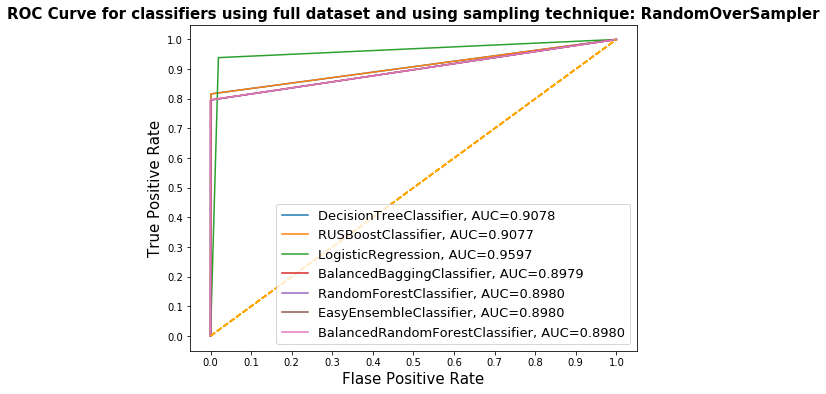

Time elapsed: -191.71643209457397
Straitified kfold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - DecisionTreeClassifier using sampling strategy - RandomOverSampler
----------------------------------------
Time training: -4.297040700912476
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - RUSBoostClassifier using sampling strategy - RandomOverSampler
----------------------------------------
Time training: -8.7605140209198
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - LogisticRegression using sampling strategy - RandomOverSampler
-----------------------

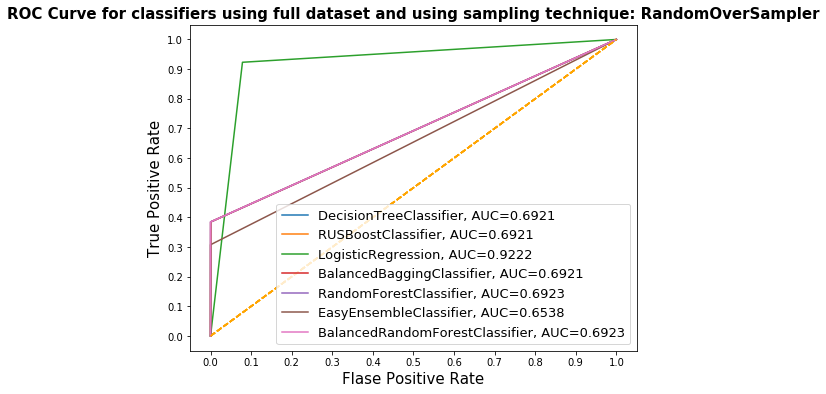

Time elapsed: -165.2642912864685


In [0]:

print("STARTING PIPELINE 2 - RandomOversampling PIPE", "-"*40)


random_oversampler = RandomOverSampler(random_state=42)
results2 = base_pipeline(data=new_df, sampling_technique=random_oversampler, clean=False, verbose=False, plot=True)

results2_clean = base_pipeline(data= new_df, sampling_technique=random_oversampler, clean=True, verbose=False, plot=True)


results2.to_csv("Results/pipe4/results2(OVER).csv", index=True, encoding='utf8')
results2_clean.to_csv("Results/pipe4/results2(OVER)-clean.csv", index=True, encoding='utf8')





In [0]:
print(results2)
# print(results2_clean)

                                                    classifier  ...  recall
DecisionTreeClassifier                  DecisionTreeClassifier  ...  0.8163
RUSBoostClaassifier                         RUSBoostClassifier  ...  0.8163
LogisiticRegression                         LogisticRegression  ...  0.9388
BalancedBaggingClassifier            BalancedBaggingClassifier  ...  0.7959
RandomForestClassifier                  RandomForestClassifier  ...  0.7959
EasyEnsembleClassifier                  EasyEnsembleClassifier  ...  0.7959
BalancedRandomForestClassifier  BalancedRandomForestClassifier  ...  0.7959

[7 rows x 9 columns]


In [0]:

# for i in results2, results2_clean:

#   stat0, p0 = wilcoxon(results1['roc_auc'], results1_clean['roc_auc'])
#   stat1, p1 = wilcoxon(results1['f1'], results1_clean['f1'])

# print('ROC_AUC: stat=%.3f, p=%.3f'%(stat0,p0))
# print('F1:   stat=%.3f, p=%.3f'%(stat1, p1))
# if p0 > 0.05:
# 	print('ROC_AUC: Probably the same distribution')
# else:
# 	print('ROC_AUC: Probably different distributions')
# if p1 > 0.05:
# 	print('F1: Probably the same distribution')
# else:
# 	print('F1: Probably different distributions')

In [0]:

#Display the results of the models as a dataframe
#Sort models according to f1 score.
results2.sort_values('f1',ascending=False)


,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+RandomOverSampler,RandomOverSampler,0.8864,0.898,0.8921,0.999,1,0.7959
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+RandomOverSampler,RandomOverSampler,0.8864,0.898,0.8921,0.999,1,0.7959
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+RandomOverSamp...,RandomOverSampler,0.8864,0.898,0.8921,0.999,1,0.7959
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+RandomOverSampler,RandomOverSampler,0.8667,0.8979,0.892,0.9987,0.9512,0.7959
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+RandomOverSampler,RandomOverSampler,0.8421,0.9078,0.9032,0.9984,0.8696,0.8163
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+RandomOverSampler,RandomOverSampler,0.8163,0.9077,0.9031,0.9981,0.8163,0.8163
LogisiticRegression,LogisticRegression,LogisticRegression+RandomOverSampler,RandomOverSampler,0.3297,0.9597,0.9595,0.9804,0.2,0.9388


In [0]:

#Display the results of the models as a dataframe
#Sort models according to f1 score.
results2.sort_values('roc_auc',ascending=False)


,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
LogisiticRegression,LogisticRegression,LogisticRegression+RandomOverSampler,RandomOverSampler,0.3297,0.9597,0.9595,0.9804,0.2,0.9388
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+RandomOverSampler,RandomOverSampler,0.8421,0.9078,0.9032,0.9984,0.8696,0.8163
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+RandomOverSampler,RandomOverSampler,0.8163,0.9077,0.9031,0.9981,0.8163,0.8163
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+RandomOverSampler,RandomOverSampler,0.8864,0.898,0.8921,0.999,1,0.7959
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+RandomOverSampler,RandomOverSampler,0.8864,0.898,0.8921,0.999,1,0.7959
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+RandomOverSamp...,RandomOverSampler,0.8864,0.898,0.8921,0.999,1,0.7959
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+RandomOverSampler,RandomOverSampler,0.8667,0.8979,0.892,0.9987,0.9512,0.7959


In [0]:

print('Best Model per Metric using Random Oversampling')
for metric in results2.columns:
    print(f'{metric.capitalize()}:',results2.sort_values(metric,ascending=False).index[0])


Best Model per Metric using Random Oversampling
Classifier: RandomForestClassifier
Strategy: RandomForestClassifier
Samp_technique: DecisionTreeClassifier
F1: RandomForestClassifier
Roc_auc: LogisiticRegression
G_mean: LogisiticRegression
Accuracy: RandomForestClassifier
Precision: RandomForestClassifier
Recall: LogisiticRegression


In [0]:
print("STARTING PIPELINE 3 - Borderline SMOTE PIPE", "-"*20)

STARTING PIPELINE 3 - Borderline SMOTE PIPE --------------------


Straitified kfold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - DecisionTreeClassifier using sampling strategy - BorderlineSMOTE
----------------------------------------
Time training: -20.880037307739258
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - RUSBoostClassifier using sampling strategy - BorderlineSMOTE
----------------------------------------
Time training: -42.64758324623108
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - LogisticRegression using sampling strategy - BorderlineSMOTE
----------------------------------------
Time training: -48.

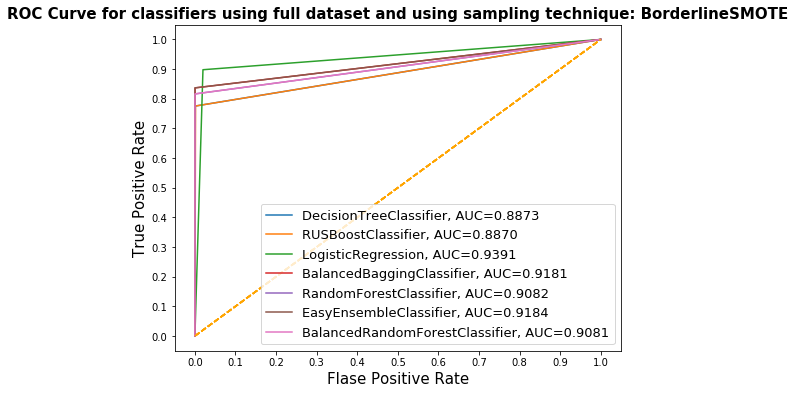

Time elapsed: -530.6578180789948
Straitified kfold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - DecisionTreeClassifier using sampling strategy - BorderlineSMOTE
----------------------------------------
Time training: -23.61099410057068
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - RUSBoostClassifier using sampling strategy - BorderlineSMOTE
----------------------------------------
Time training: -48.34972810745239
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - LogisticRegression using sampling strategy - BorderlineSMOTE
----------------------------

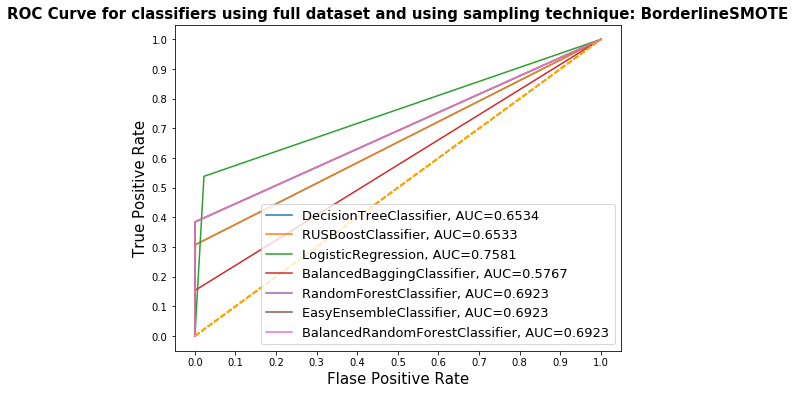

Time elapsed: -576.6415679454803


In [0]:
#PIPELINE 3 - BORDERLINE SMOTE

borderline_smote = BorderlineSMOTE(random_state=42)
results3 = base_pipeline(data=new_df, sampling_technique=borderline_smote, clean=False, verbose=False, plot=True )
results3_clean = base_pipeline(data=new_df, sampling_technique=borderline_smote, clean=True, verbose=False, plot=True )

results3.to_csv("Results/pipe4/results3(BORDER_smote).csv", index=True, encoding='utf8')
results3_clean.to_csv("Results/pipe4/results3(BORDER_smote)-clean.csv", index=True, encoding='utf8')


In [0]:

#Display the results of the models as a dataframe
#Sort models according to f1 score.


print(results3.sort_values('f1',ascending=False))

print("---"*10)


#Display the results of the models as a dataframe
#Sort models according to f1 score.
results3.sort_values('roc_auc',ascending=False)



                                                    classifier  ...  recall
EasyEnsembleClassifier                  EasyEnsembleClassifier  ...  0.8367
RandomForestClassifier                  RandomForestClassifier  ...  0.8163
BalancedRandomForestClassifier  BalancedRandomForestClassifier  ...  0.8163
BalancedBaggingClassifier            BalancedBaggingClassifier  ...  0.8367
DecisionTreeClassifier                  DecisionTreeClassifier  ...  0.7755
RUSBoostClaassifier                         RUSBoostClassifier  ...  0.7755
LogisiticRegression                         LogisticRegression  ...   0.898

[7 rows x 9 columns]
------------------------------


,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
LogisiticRegression,LogisticRegression,LogisticRegression+BorderlineSMOTE,BorderlineSMOTE,0.3132,0.9391,0.9382,0.9797,0.1897,0.898
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+BorderlineSMOTE,BorderlineSMOTE,0.9111,0.9184,0.9147,0.9992,1,0.8367
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+BorderlineSMOTE,BorderlineSMOTE,0.8632,0.9181,0.9145,0.9986,0.8913,0.8367
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+BorderlineSMOTE,BorderlineSMOTE,0.8989,0.9082,0.9035,0.9991,1,0.8163
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+BorderlineSMOTE,BorderlineSMOTE,0.8889,0.9081,0.9035,0.999,0.9756,0.8163
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+BorderlineSMOTE,BorderlineSMOTE,0.7917,0.8873,0.8802,0.9979,0.8085,0.7755
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+BorderlineSMOTE,BorderlineSMOTE,0.7525,0.887,0.88,0.9974,0.7308,0.7755


In [0]:

print('Best Model per Metric using Borderline SMOTE')
for metric in results3.columns:
    print(f'{metric.capitalize()}:',results3.sort_values(metric,ascending=False).index[0])


Best Model per Metric using Borderline SMOTE
Classifier: RandomForestClassifier
Strategy: RandomForestClassifier
Samp_technique: DecisionTreeClassifier
F1: EasyEnsembleClassifier
Roc_auc: LogisiticRegression
G_mean: LogisiticRegression
Accuracy: EasyEnsembleClassifier
Precision: RandomForestClassifier
Recall: LogisiticRegression


In [0]:
print("STARTING PIPELINE 4 - SMOTE-SVM PIPE", "-"*40)

STARTING PIPELINE 4 - SMOTE-SVM PIPE ----------------------------------------


Straitified kfold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - DecisionTreeClassifier using sampling strategy - SVMSMOTE
----------------------------------------
Time training: -23.59871482849121
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - RUSBoostClassifier using sampling strategy - SVMSMOTE
----------------------------------------
Time training: -47.39994144439697
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - LogisticRegression using sampling strategy - SVMSMOTE
----------------------------------------
Time training: -59.49465084075928
Using l

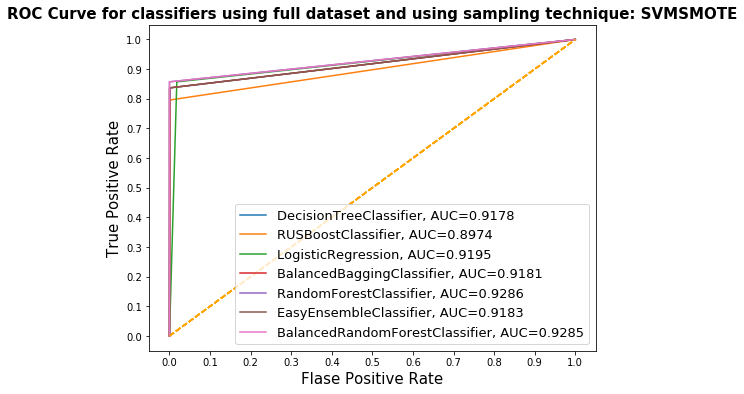

Time elapsed: -482.215455532074
Straitified kfold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - DecisionTreeClassifier using sampling strategy - SVMSMOTE
----------------------------------------
Time training: -21.362106323242188
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - RUSBoostClassifier using sampling strategy - SVMSMOTE
----------------------------------------
Time training: -44.10057616233826
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - LogisticRegression using sampling strategy - SVMSMOTE
----------------------------------------
Time tra

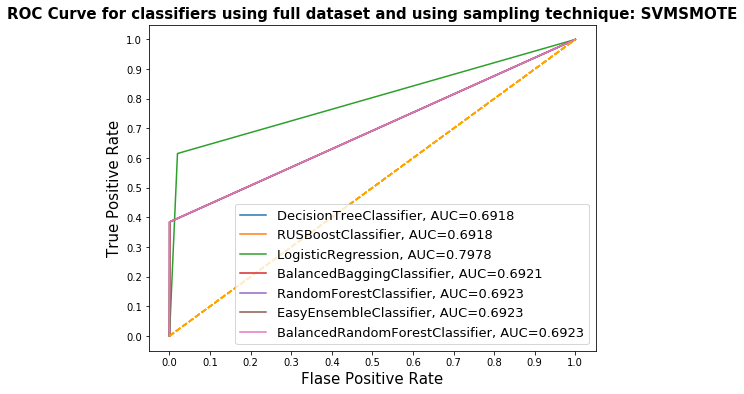

Time elapsed: -508.7034547328949


In [0]:
from sklearn.svm import SVC
#SMOTE SVM

smote_svm = SVMSMOTE(random_state=rand_state, svm_estimator=SVC(kernel='sigmoid', random_state=rand_state))
results4 = base_pipeline(data=new_df, sampling_technique=smote_svm, clean=False, verbose=False, plot=True)
results4_clean = base_pipeline(data=new_df, sampling_technique=smote_svm, clean=True, verbose=False, plot=True)

results4.to_csv("Results/pipe4/results4(SVM_smote).csv", index=True, encoding='utf8')
results4_clean.to_csv("Results/pipe4/results4(SVM_smote)-clean.csv", index=True, encoding='utf8')

In [0]:

#Display the results of the models as a dataframe
#Sort models according to f1 score.


print(results4.sort_values('f1',ascending=False))

print("---"*10)


#Display the results of the models as a dataframe
#Sort models according to f1 score.
results4.sort_values('roc_auc',ascending=False)



                                                    classifier  ...  recall
RandomForestClassifier                  RandomForestClassifier  ...  0.8571
BalancedRandomForestClassifier  BalancedRandomForestClassifier  ...  0.8571
EasyEnsembleClassifier                  EasyEnsembleClassifier  ...  0.8367
BalancedBaggingClassifier            BalancedBaggingClassifier  ...  0.8367
DecisionTreeClassifier                  DecisionTreeClassifier  ...  0.8367
RUSBoostClaassifier                         RUSBoostClassifier  ...  0.7959
LogisiticRegression                         LogisticRegression  ...  0.8571

[7 rows x 9 columns]
------------------------------


,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+SVMSMOTE,SVMSMOTE,0.9231,0.9286,0.9258,0.9993,1,0.8571
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+SVMSMOTE,SVMSMOTE,0.913,0.9285,0.9258,0.9992,0.9767,0.8571
LogisiticRegression,LogisticRegression,LogisticRegression+SVMSMOTE,SVMSMOTE,0.3206,0.9195,0.9174,0.9813,0.1972,0.8571
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+SVMSMOTE,SVMSMOTE,0.9011,0.9183,0.9147,0.9991,0.9762,0.8367
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+SVMSMOTE,SVMSMOTE,0.8632,0.9181,0.9145,0.9986,0.8913,0.8367
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+SVMSMOTE,SVMSMOTE,0.82,0.9178,0.9142,0.9981,0.8039,0.8367
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+SVMSMOTE,SVMSMOTE,0.7879,0.8974,0.8916,0.9978,0.78,0.7959


In [0]:

#Display the results of the models as a dataframe
#Sort models according to f1 score.


print(results4.sort_values('f1',ascending=False))

print("---"*10)


#Display the results of the models as a dataframe
#Sort models according to f1 score.
results4.sort_values('roc_auc',ascending=False)



                                                    classifier  ...  recall
RandomForestClassifier                  RandomForestClassifier  ...  0.8571
BalancedRandomForestClassifier  BalancedRandomForestClassifier  ...  0.8571
EasyEnsembleClassifier                  EasyEnsembleClassifier  ...  0.8367
BalancedBaggingClassifier            BalancedBaggingClassifier  ...  0.8367
DecisionTreeClassifier                  DecisionTreeClassifier  ...  0.8367
RUSBoostClaassifier                         RUSBoostClassifier  ...  0.7959
LogisiticRegression                         LogisticRegression  ...  0.8571

[7 rows x 9 columns]
------------------------------


,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+SVMSMOTE,SVMSMOTE,0.9231,0.9286,0.9258,0.9993,1,0.8571
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+SVMSMOTE,SVMSMOTE,0.913,0.9285,0.9258,0.9992,0.9767,0.8571
LogisiticRegression,LogisticRegression,LogisticRegression+SVMSMOTE,SVMSMOTE,0.3206,0.9195,0.9174,0.9813,0.1972,0.8571
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+SVMSMOTE,SVMSMOTE,0.9011,0.9183,0.9147,0.9991,0.9762,0.8367
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+SVMSMOTE,SVMSMOTE,0.8632,0.9181,0.9145,0.9986,0.8913,0.8367
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+SVMSMOTE,SVMSMOTE,0.82,0.9178,0.9142,0.9981,0.8039,0.8367
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+SVMSMOTE,SVMSMOTE,0.7879,0.8974,0.8916,0.9978,0.78,0.7959


In [0]:

print('Best Model per Metric using SVMSMOTE')
for metric in results4.columns:
    print(f'{metric.capitalize()}:',results4.sort_values(metric,ascending=False).index[0])


Best Model per Metric using SVMSMOTE
Classifier: RandomForestClassifier
Strategy: RandomForestClassifier
Samp_technique: DecisionTreeClassifier
F1: RandomForestClassifier
Roc_auc: RandomForestClassifier
G_mean: RandomForestClassifier
Accuracy: RandomForestClassifier
Precision: RandomForestClassifier
Recall: LogisiticRegression


In [0]:
print("STARTING PIPELINE 5 - SMOTE-EEN PIPE", "-"*40)

STARTING PIPELINE 5 - SMOTE-EEN PIPE ----------------------------------------


Straitified kfold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - DecisionTreeClassifier using sampling strategy - SMOTEENN
----------------------------------------
Time training: -252.10722398757935
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - RUSBoostClassifier using sampling strategy - SMOTEENN
----------------------------------------
Time training: -518.4516043663025
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - LogisticRegression using sampling strategy - SMOTEENN
----------------------------------------
Time training: -744.1594467163086
Using 

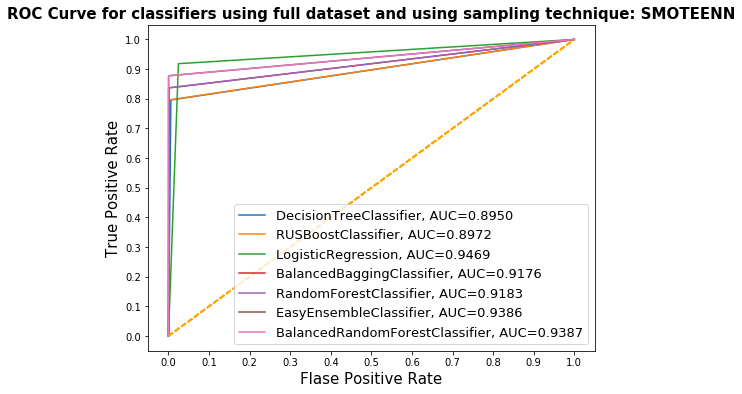

Time elapsed: -1962.9186012744904
Straitified kfold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - DecisionTreeClassifier using sampling strategy - SMOTEENN
----------------------------------------
Time training: -225.42536425590515
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - RUSBoostClassifier using sampling strategy - SMOTEENN
----------------------------------------
Time training: -452.312299489975
Using lentgh of X for training: 84122; Using Length of Y for training: 84122
Using lentgh of X for testing: 9345; Using Length of Y for test: 9345
Currently training model - LogisticRegression using sampling strategy - SMOTEENN
----------------------------------------
Time tr

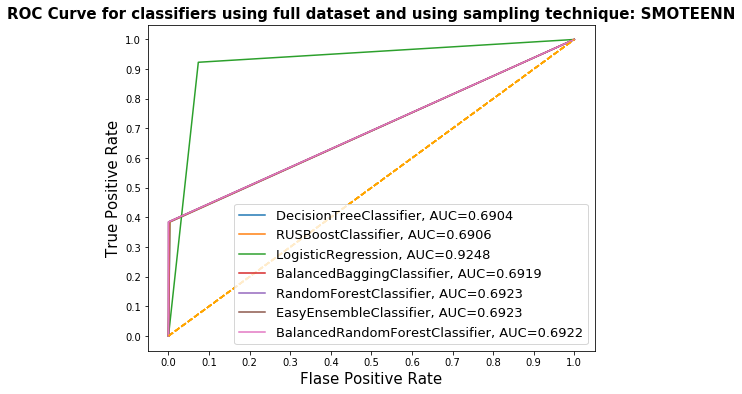

Time elapsed: -1938.671261548996


In [0]:


smoteen = SMOTEENN(random_state=rand_state)

results5=base_pipeline(data=new_df, sampling_technique=smoteen, clean=False,verbose=False, plot=True)
results5_clean=base_pipeline(data=new_df, sampling_technique=smoteen, clean=True,verbose=False, plot=True)

results5.to_csv("Results/pipe4/results5(EN_smote).csv", index=True, encoding='utf8')
results5_clean.to_csv("Results/pipe4/results5(EN_smote)-clean.csv", index=True, encoding='utf8')

In [0]:

print(results5.sort_values('f1',ascending=False))

print("---"*10)


#Display the results of the models as a dataframe
#Sort models according to f1 score.
results5.sort_values('roc_auc',ascending=False)

                                                    classifier  ...  recall
BalancedRandomForestClassifier  BalancedRandomForestClassifier  ...  0.8776
EasyEnsembleClassifier                  EasyEnsembleClassifier  ...  0.8776
RandomForestClassifier                  RandomForestClassifier  ...  0.8367
BalancedBaggingClassifier            BalancedBaggingClassifier  ...  0.8367
RUSBoostClaassifier                         RUSBoostClassifier  ...  0.7959
DecisionTreeClassifier                  DecisionTreeClassifier  ...  0.7959
LogisiticRegression                         LogisticRegression  ...  0.9184

[7 rows x 9 columns]
------------------------------


,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
LogisiticRegression,LogisticRegression,LogisticRegression+SMOTEENN,SMOTEENN,0.2761,0.9469,0.9465,0.9752,0.1625,0.9184
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+SMOTEENN,SMOTEENN,0.9149,0.9387,0.9367,0.9992,0.9556,0.8776
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+SMOTEENN,SMOTEENN,0.9053,0.9386,0.9366,0.9991,0.9348,0.8776
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+SMOTEENN,SMOTEENN,0.8913,0.9183,0.9146,0.999,0.9535,0.8367
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+SMOTEENN,SMOTEENN,0.7885,0.9176,0.9141,0.9977,0.7455,0.8367
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+SMOTEENN,SMOTEENN,0.7573,0.8972,0.8914,0.9974,0.7222,0.7959
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+SMOTEENN,SMOTEENN,0.5417,0.895,0.8895,0.9931,0.4105,0.7959


In [0]:

print('Best Model per Metric using SMOTE-EEN')
for metric in results5.columns:
    print(f'{metric.capitalize()}:',results5.sort_values(metric,ascending=False).index[0])


Best Model per Metric using SMOTE-EEN
Classifier: RandomForestClassifier
Strategy: RandomForestClassifier
Samp_technique: DecisionTreeClassifier
F1: BalancedRandomForestClassifier
Roc_auc: LogisiticRegression
G_mean: LogisiticRegression
Accuracy: BalancedRandomForestClassifier
Precision: BalancedRandomForestClassifier
Recall: LogisiticRegression


In [0]:
print("STARTING PIPELINE 6 - SMOTE-Tomek PIPE", "-"*40)

STARTING PIPELINE 6 - SMOTE-Tomek PIPE ----------------------------------------


Straitified kfold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - DecisionTreeClassifier using sampling strategy - SMOTETomek
----------------------------------------
Time training: -151.0310938358307
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - RUSBoostClassifier using sampling strategy - SMOTETomek
----------------------------------------
Time training: -302.661563873291
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - LogisticRegression using sampling strategy - SMOTETomek
----------------------------------------
Time training: -449.3552074432373
Us

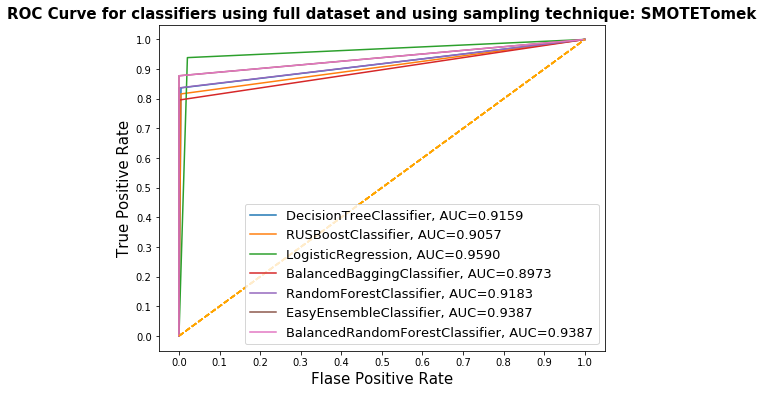

Time elapsed: -1391.862150669098
Straitified kfold: StratifiedKFold(n_splits=10, random_state=42, shuffle=False)
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - DecisionTreeClassifier using sampling strategy - SMOTETomek
----------------------------------------
Time training: -168.82487273216248
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - RUSBoostClassifier using sampling strategy - SMOTETomek
----------------------------------------
Time training: -338.8612082004547
Using lentgh of X for training: 85738; Using Length of Y for training: 85738
Using lentgh of X for testing: 9526; Using Length of Y for test: 9526
Currently training model - LogisticRegression using sampling strategy - SMOTETomek
----------------------------------------
T

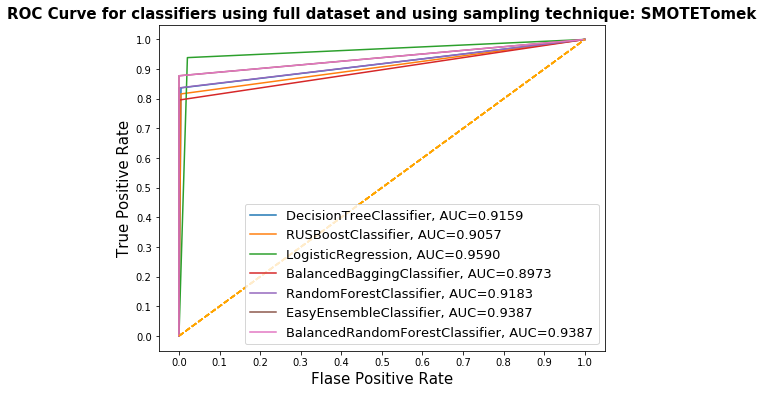

Time elapsed: -1456.7941014766693


In [0]:


smote_tomek = SMOTETomek(random_state=rand_state)

results6=base_pipeline(data=new_df, sampling_technique=smote_tomek, clean=False, verbose=False, plot=True)
results6_clean=base_pipeline(data=new_df, sampling_technique=smote_tomek, clean=False, verbose=False, plot=True)


results6.to_csv("Results/pipe4/results6(TOMEK_smote).csv", index=True, encoding='utf8')

results6_clean.to_csv("Results/pipe4/results6(TOMEK_smote)-clean.csv", index=True, encoding='utf8')

In [0]:
results6.sort_values('f1',ascending=False)


,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+SMOTETomek,SMOTETomek,0.9247,0.9387,0.9367,0.9993,0.9773,0.8776
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+SMOTETomek,SMOTETomek,0.9247,0.9387,0.9367,0.9993,0.9773,0.8776
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+SMOTETomek,SMOTETomek,0.8913,0.9183,0.9146,0.999,0.9535,0.8367
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+SMOTETomek,SMOTETomek,0.78,0.8973,0.8916,0.9977,0.7647,0.7959
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+SMOTETomek,SMOTETomek,0.5985,0.9159,0.9125,0.9942,0.4659,0.8367
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+SMOTETomek,SMOTETomek,0.5926,0.9057,0.9013,0.9942,0.4651,0.8163
LogisiticRegression,LogisticRegression,LogisticRegression+SMOTETomek,SMOTETomek,0.3151,0.959,0.9588,0.979,0.1893,0.9388


In [0]:

results6.sort_values('f1',ascending=False)

print("---"*10)


#Display the results of the models as a dataframe
#Sort models according to f1 score.
results6.sort_values('roc_auc',ascending=False)

------------------------------


,classifier,strategy,samp_technique,f1,roc_auc,g_mean,accuracy,precision,recall
LogisiticRegression,LogisticRegression,LogisticRegression+SMOTETomek,SMOTETomek,0.3151,0.959,0.9588,0.979,0.1893,0.9388
EasyEnsembleClassifier,EasyEnsembleClassifier,EasyEnsembleClassifier+SMOTETomek,SMOTETomek,0.9247,0.9387,0.9367,0.9993,0.9773,0.8776
BalancedRandomForestClassifier,BalancedRandomForestClassifier,BalancedRandomForestClassifier+SMOTETomek,SMOTETomek,0.9247,0.9387,0.9367,0.9993,0.9773,0.8776
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier+SMOTETomek,SMOTETomek,0.8913,0.9183,0.9146,0.999,0.9535,0.8367
DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeClassifier+SMOTETomek,SMOTETomek,0.5985,0.9159,0.9125,0.9942,0.4659,0.8367
RUSBoostClaassifier,RUSBoostClassifier,RUSBoostClassifier+SMOTETomek,SMOTETomek,0.5926,0.9057,0.9013,0.9942,0.4651,0.8163
BalancedBaggingClassifier,BalancedBaggingClassifier,BalancedBaggingClassifier+SMOTETomek,SMOTETomek,0.78,0.8973,0.8916,0.9977,0.7647,0.7959


In [0]:

print('Best Model per Metric using SMOTE TOMEK')
for metric in results6.columns:
    print(f'{metric.capitalize()}:',results6.sort_values(metric,ascending=False).index[0])




Best Model per Metric using SMOTE TOMEK
Classifier: RandomForestClassifier
Strategy: RandomForestClassifier
Samp_technique: DecisionTreeClassifier
F1: EasyEnsembleClassifier
Roc_auc: LogisiticRegression
G_mean: LogisiticRegression
Accuracy: EasyEnsembleClassifier
Precision: EasyEnsembleClassifier
Recall: LogisiticRegression


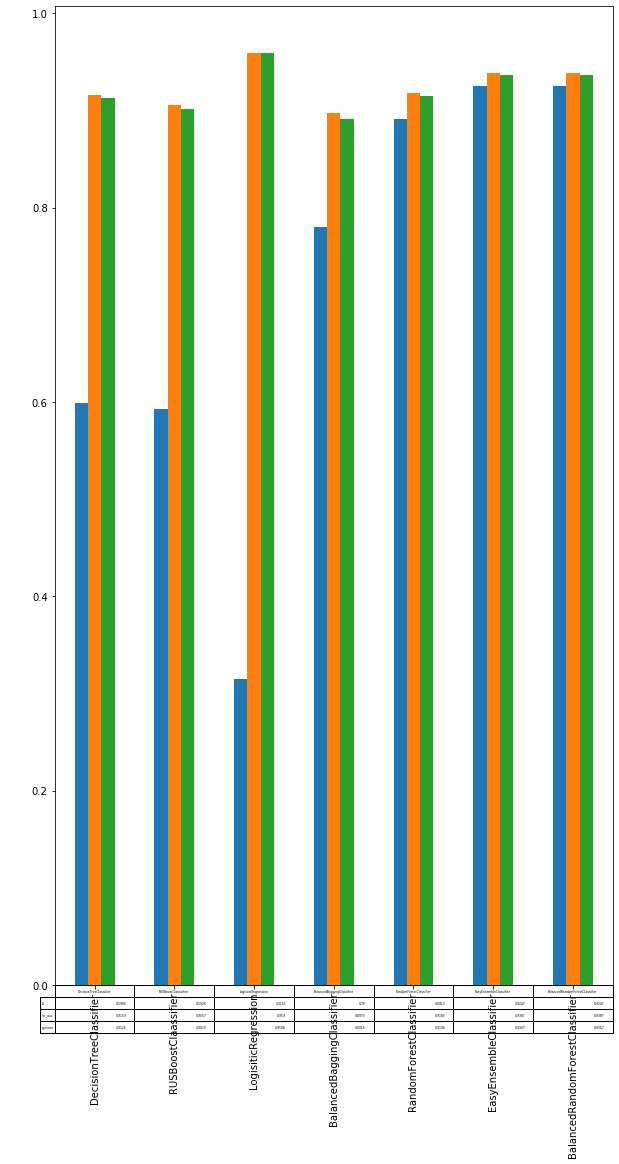

In [0]:


results6.plot.bar(y=['f1', 'roc_auc', 'g_mean'], figsize=(10,18), table=True, legend=False)

In [0]:
#Seaborn --factorplot

colors = ["windows blue", "orange red", "brown", "amber", 'purple', 'jade', 'grey']  
myPalette = sns.xkcd_palette(colors) #passing colors to xkcd_palette function

sns.set(style="white") #white background
g = sns.factorplot(x="samp_technique", y="roc_auc", hue="classifier", data=df_clean, saturation=5, size=7, aspect=3, kind="bar",
          palette= myPalette, legend=False) #removes legend

g.set(ylim=(0, 1)) 
g.despine(right=False) 
g.set_xlabels("") 
g.set_ylabels("")  
g.set_yticklabels("") 


#Matplotlib --legend creation

myLegend=plt.legend(bbox_to_anchor=(0., 1.2, 1., .102), prop ={'size':10}, loc=10, ncol=7,  #left, bottom, width, height
        title=r'ROC AUC Score per classifier using full dataset (after outlier removal)')                    
myLegend.get_title().set_fontsize('24')



#Matplotlib --anotación de barras

ax=g.ax
for p in ax.patches:
    ax.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=11, color='gray', rotation=90, xytext=(0, 20),
        textcoords='offset points')




NameError: ignored

In [0]:
ls

In [0]:
results0

In [0]:
results1

In [0]:
results2

In [0]:
combined_df = pd.concat([results0, results1, results2, results3,
                         results4, results5, results6], keys=['No Sampling', 'SMOTE',
                                                        'SimpleOverSampling', 'BorderlineSmote','SVM-Smote', 'SMOTE-EN', 'SMOTE-Tomek'])



In [0]:
combined_df_clean = pd.concat([results0_clean, results1_clean,
                               results2_clean, results3_clean, results4_clean, results5_clean, results6_clean], keys=['*No Sampling*', '*SMOTE*',
                                                                                                '*SimpleOverSampling*', '*BorderlineSmote*',
                                                                                                '*SVM-Smote*', '*SMOTE-EN*', '*SMOTE-Tomek*'])



In [0]:
combined_df.to_csv("Results/pipe4/results_combined.csv", index=True, encoding='utf8')             
combined_df_clean.to_csv("Results/pipe4/results_combined-clean.csv", index=True, encoding='utf8')                         

In [0]:
combined_df.columns[0]

In [0]:
combined_df.sort_values('f1',ascending=False)


In [0]:
combined_df.sort_values('roc_auc',ascending=False)


In [0]:
# # Since all the columns in car_data_count are the same, we will use just the first column as the rest yield the same result. iloc allows us to take all the rows and the zeroth column.

# #pd.DataFrame({'Strategy': combined_df['strategy'], 'Classifiers': combined_df_series}).plot(kind='barh' ax=ax1)


# from matplotlib.ticker import AutoMinorLocator
# fig = plt.figure(figsize=(18,6))
# mean_f1 = combined_df['f1'].mean(axis=0)
# mean_roc = combined_df['roc_auc'].mean(axis=0)
# abv_avg_f1 = combined_df[combined_df['f1'] > mean_f1]
# ax1 = sns.barplot('classifier', "f1", data=abv_avg_f1, hue='samp_technique')
# ax1.minorticks_on()
# ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
# ax1.grid(which='minor', axis='x', linewidth=1)



In [0]:
from matplotlib.ticker import AutoMinorLocator
fig = plt.figure(figsize=(18,6))
mean_f1 = combined_df['f1'].mean(axis=0)
mean_roc = combined_df['roc_auc'].mean(axis=0)
abv_avg_f1 = combined_df[combined_df['f1'] > mean_f1]
ax1 = sns.barplot('classifier', "roc_auc", data=combined_df, hue='samp_technique')
ax1.minorticks_on()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

In [0]:


fig = plt.figure(figsize=(25,6))
mean_f1 = combined_df['f1'].mean(axis=0)
mean_roc = combined_df['roc_auc'].mean(axis=0)
abv_avg_f1 = combined_df[combined_df['f1'] > mean_f1]





ax1 = sns.barplot('classifier', "g_mean", data=combined_df, hue='samp_technique')
ax1.minorticks_on()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')



